In [1]:
import neuraltda.simpComp as sc
import neuraltda.topology2 as tp2
import neuraltda.spectralAnalysis as sa
import pickle
import glob
import os
import numpy as np
reload(sa)
reload(sc)

/Users/brad/anaconda/envs/neuraltda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


<module 'neuraltda.simpComp' from '/Users/brad/GentnerLab/code/NeuralTDA/neuraltda/simpComp.pyc'>

In [ ]:
blockPath = '/Volumes/gentner/btheilma/experiments/B1235/phy051316/Pen02_Lft_AP200_ML800__Site03_Z3000__B1235_cat_P02_S03_1/'
bdf = '/Volumes/gentner/btheilma/experiments/B1235/phy051316/Pen02_Lft_AP200_ML800__Site03_Z3000__B1235_cat_P02_S03_1/binned_data/20170128T005306Z/20170128T005306Z-10.0-5.0.binned'
scgf = '/Volumes/gentner/btheilma/experiments/B1235/phy051316/Pen02_Lft_AP200_ML800__Site03_Z3000__B1235_cat_P02_S03_1/scg/20170128T005306Z-10.0-5.0.scg'

In [ ]:
thresh = 15.0
sa.computeChainGroups(blockPath, bdf, thresh)

In [ ]:
with open(scgf, 'r') as scgff:
    scg = pickle.load(scgff)

# Bin, Compute Chain Group Generators

In [ ]:
bp1 = '/Volumes/gentner/btheilma/experiments/B1235/phy051316/Pen02_Lft_AP200_ML800__Site01_Z3000__B1235_cat_P02_S01_1/'

bps = [bp1]

winSize = 10.0 #ms
segmentInfo = {'period': 1}
ncellsperm = 0
nperms = 0
nshuffs = 0
thresh = 6.0
propOverlap = 0.5
dtovr = propOverlap*winSize

for blockPath in bps:
    bfdict = tp2.dag_bin(blockPath, winSize, segmentInfo, ncellsperm, nperms, nshuffs, dtOverlap=dtovr)
    bdf = glob.glob(os.path.join(bfdict['raw'], '*.binned'))[0]
    sa.computeChainGroups(blockPath, bdf, thresh)

In [ ]:
bdf = glob.glob(os.path.join(bfdict['raw'], '*.binned'))[0]
sa.computeChainGroups(blockPath, bdf, thresh)

In [2]:
blockPath = '/Volumes/gentner/btheilma/experiments/B1235/phy051316/Pen02_Lft_AP200_ML800__Site01_Z3000__B1235_cat_P02_S01_1/'
#Load simplicial chain generator dictionary
scgfs = glob.glob(os.path.join(blockPath, 'scg/*.scg'))[0]
with open(scgfs, 'r') as scgf:
    scg = pickle.load(scgf)

In [13]:

stimtrials = [(s, t) for s in scg.keys() for t in range(20)]
stimtrials = [(s, t) for s in scg.keys()[0:6] for t in range(2)]
stimtrials

[(u'F_scaled_burung', 0),
 (u'F_scaled_burung', 1),
 (u'K_scaled_burung', 0),
 (u'K_scaled_burung', 1),
 (u'O_scaled_burung', 0),
 (u'O_scaled_burung', 1),
 (u'P_scaled_burung', 0),
 (u'P_scaled_burung', 1),
 (u'M_scaled_burung', 0),
 (u'M_scaled_burung', 1),
 (u'C_scaled_burung', 0),
 (u'C_scaled_burung', 1)]

In [ ]:
beta = 1
divsave = []
for ind in range(len(stimtrials)):
    for ind2 in range(ind, len(stimtrials)):
        
        stim1 = stimtrials[ind][0]
        t1 = stimtrials[ind][1]
        stim2 = stimtrials[ind2][0]
        t2 = stimtrials[ind2][1]
        print(stim1, t1, stim2, t2)
        scg1 = scg[stim1][t1]
        scg2 = scg[stim2][t2]
        
        scgTot = sc.simplexUnion(scg1, scg2)
        D1 = sc.maskedBoundaryOperatorMatrix(scgTot, scg1)
        D2 = sc.maskedBoundaryOperatorMatrix(scgTot, scg2)
        
        rhos1 = sc.densityMatrices(D1, beta*np.ones(len(D1)))
        rhos2 = sc.densityMatrices(D2, beta*np.ones(len(D2)))
        
        div = sc.JSdivergences(rhos1, rhos2)
        divsave.append(((stim1, t1), (stim2, t2), div))

(u'F_scaled_burung', 0, u'F_scaled_burung', 0)
(u'F_scaled_burung', 0, u'F_scaled_burung', 1)
(u'F_scaled_burung', 0, u'K_scaled_burung', 0)
(u'F_scaled_burung', 0, u'K_scaled_burung', 1)
(u'F_scaled_burung', 0, u'O_scaled_burung', 0)
(u'F_scaled_burung', 0, u'O_scaled_burung', 1)
(u'F_scaled_burung', 0, u'P_scaled_burung', 0)
(u'F_scaled_burung', 0, u'P_scaled_burung', 1)
(u'F_scaled_burung', 0, u'M_scaled_burung', 0)
(u'F_scaled_burung', 0, u'M_scaled_burung', 1)


In [11]:
d = 3

mat = np.zeros((len(stimtrials), len(stimtrials)))
iu1 = np.triu_indices(len(stimtrials))

for ind, x in enumerate(divsave):
    
    mat[iu1[0][ind], iu1[1][ind]] = x[2][d]

mat = mat + mat.T

IndexError: list index out of range

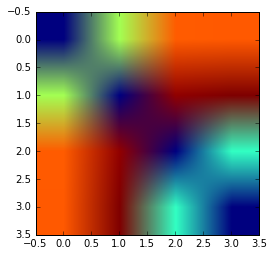

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(mat)

In [11]:
len(iu1[0])

36

In [12]:
divsave

[((u'F_scaled_burung', 0), (u'F_scaled_burung', 0), [0.0, 0.0, 0.0]),
 ((u'F_scaled_burung', 0),
  (u'F_scaled_burung', 1),
  [0.096250206232633875,
   0.25791105562857813,
   0.23454617231088756,
   1.3681835110975296]),
 ((u'F_scaled_burung', 0),
  (u'K_scaled_burung', 0),
  [0.070969130335988645,
   0.38091788233084189,
   0.32206603196492006,
   1.8140335185447738,
   2.0531506869105645]),
 ((u'F_scaled_burung', 0),
  (u'K_scaled_burung', 1),
  [0.041292243475591711,
   0.384221643245998,
   0.22002427319869639,
   2.7593547665595444,
   0.92451491422377341]),
 ((u'F_scaled_burung', 1), (u'F_scaled_burung', 1), [0.0, 0.0, 0.0, 0.0]),
 ((u'F_scaled_burung', 1),
  (u'K_scaled_burung', 0),
  [0.059068596698701833,
   0.46273249878859202,
   0.28631146747744363,
   1.0690587920903341,
   2.4399489615648413]),
 ((u'F_scaled_burung', 1),
  (u'K_scaled_burung', 1),
  [0.092522494189029025,
   0.470768653497527,
   0.22309571728634545,
   1.3003442723565921,
   1.2488728822941249]),
 ((u'K